# Exploring Movie Data

Exploring and visualizing movie data scraped from Box Office Mojo. Make sure to format your plots properly with axis labels and graph titles at the very least.

-------

 ### Data Prep
 
- Import in the standard libraries (NumPy, pandas, matplotlib)
- Read in the CSV
- Explore the data set, the columns and the types

In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')
fig_ratio = (12,6)
subplot_fig_ratio = (12,12)

In [2]:
filename = '../data/unit_08/2013_movies.csv'
df = pd.read_csv(filename)
df['ReleaseDate'] = pd.to_datetime(df['ReleaseDate'])

In [3]:
df.head()

,Title,Budget,DomesticTotalGross,Director,Rating,Runtime,ReleaseDate
0,The Hunger Games: Catching Fire,130000000.0,424668047,Francis Lawrence,PG-13,146,2013-11-22
1,Iron Man 3,200000000.0,409013994,Shane Black,PG-13,129,2013-05-03
2,Frozen,150000000.0,400738009,Chris BuckJennifer Lee,PG,108,2013-11-22
3,Despicable Me 2,76000000.0,368061265,Pierre CoffinChris Renaud,PG,98,2013-07-03
4,Man of Steel,225000000.0,291045518,Zack Snyder,PG-13,143,2013-06-14


In [4]:
df.shape

(100, 7)

In [5]:
df.describe()

,Budget,DomesticTotalGross,Runtime
count,8.900000e+01,1.000000e+02,100.000000
mean,7.474719e+07,1.005969e+08,112.260000
std,5.941692e+07,8.739641e+07,18.190696
min,2.500000e+06,2.556825e+07,75.000000
25%,2.800000e+07,4.270413e+07,98.000000
50%,5.500000e+07,6.954237e+07,112.000000
75%,1.100000e+08,1.204759e+08,123.000000
max,2.250000e+08,4.246680e+08,180.000000


In [6]:
categorical = df.dtypes[df.dtypes == "object"].index
df[categorical].describe()

,Title,Director,Rating
count,100,96,100
unique,100,93,4
top,The Hobbit: The Desolation of Smaug,Malcolm D. Lee,PG-13
freq,1,2,47


### Exercise 1 
 
- Plot Domestic Total Gross over Time.
- Try a scatterplot and a line plot.

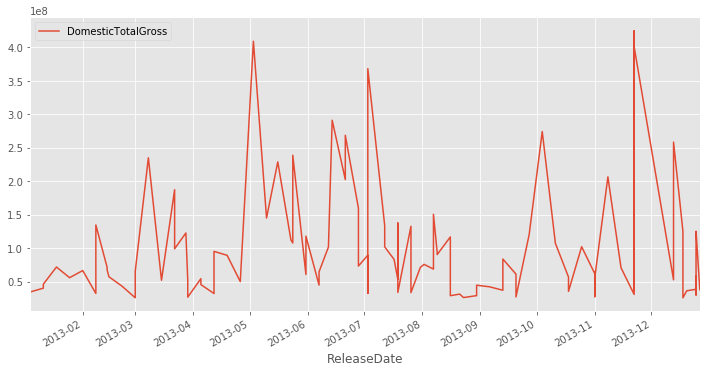

In [7]:
df.plot(x='ReleaseDate',y='DomesticTotalGross',figsize=fig_ratio);

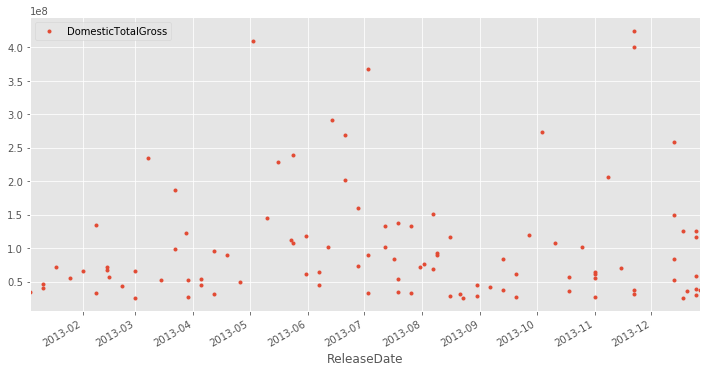

In [8]:
# Since scatter plot requires numeric columns for x and y axis, I can't use it for plotting the time series,
# which is my ReleaseDate column. I can "cheat" by using a dot as a stile instead of the line

df.plot(x='ReleaseDate',y='DomesticTotalGross',figsize=fig_ratio, style='.');

### Exercise 2

- Plot Runtime vs. Domestic Total Gross. 
- Try a scatterplot and a line plot.

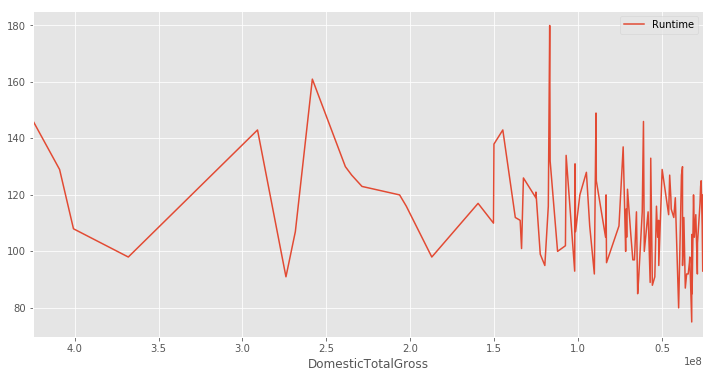

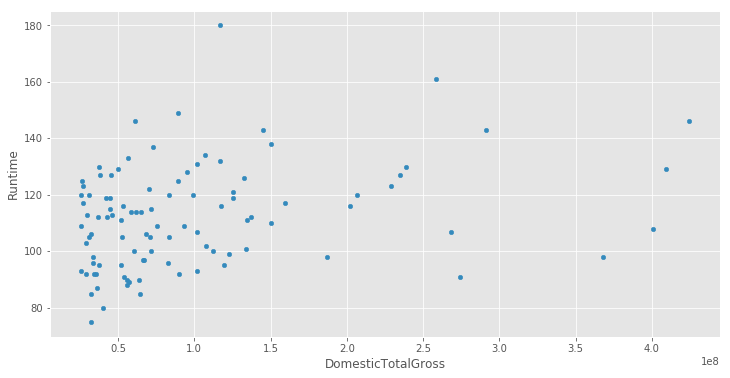

In [9]:
df.plot(x='DomesticTotalGross',y='Runtime',figsize=fig_ratio) 
df.plot(kind = 'scatter', x='DomesticTotalGross',y='Runtime',figsize=fig_ratio);

### Exercise 3

- Group your data by Rating.
- Find the average runtime and domestic total gross at each level of Rating.

In [10]:
# First, I need to know count of records by rating

df['Rating'].value_counts()

PG-13    47
R        37
PG       15
G         1
Name: Rating, dtype: int64

In [11]:
df_rating_group = df[['Rating','Runtime','DomesticTotalGross','ReleaseDate']].groupby('Rating')
df_rating_group_means = df_rating_group.mean().reset_index()
df_rating_group_means

,Rating,Runtime,DomesticTotalGross
0,G,107.000000,2.684928e+08
1,PG,99.933333,1.311357e+08
2,PG-13,117.510638,1.114498e+08
3,R,110.729730,6.989243e+07


### Exercise 4

- Plot Release Date by Domestic Total Gross. Segment by Rating.
- Have all 4 groups on one plot.
- Have 4 separate plots, but part of the same matplotlib figure.

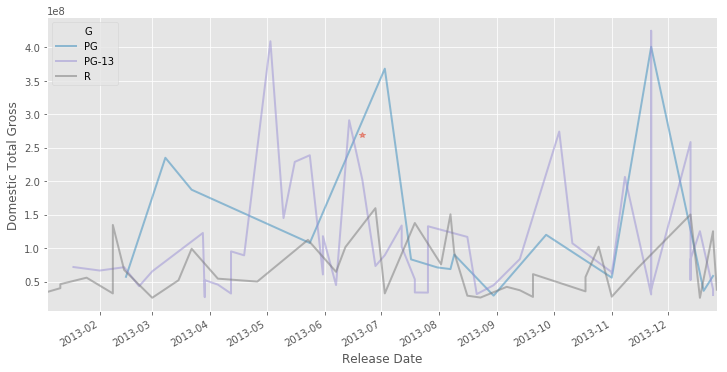

In [12]:
# All 4 groups on one plot.

fig, ax = plt.subplots(figsize=fig_ratio)

for name, group in df_rating_group:
    group.plot(x='ReleaseDate',
               y='DomesticTotalGross', 
               ax=ax, 
               label=name, 
               alpha = .5, 
               style = ('*' if name=='G' else '-'), # because there is only one record with G
               linewidth=2)
    
plt.xlabel('Release Date')
plt.ylabel('Domestic Total Gross');

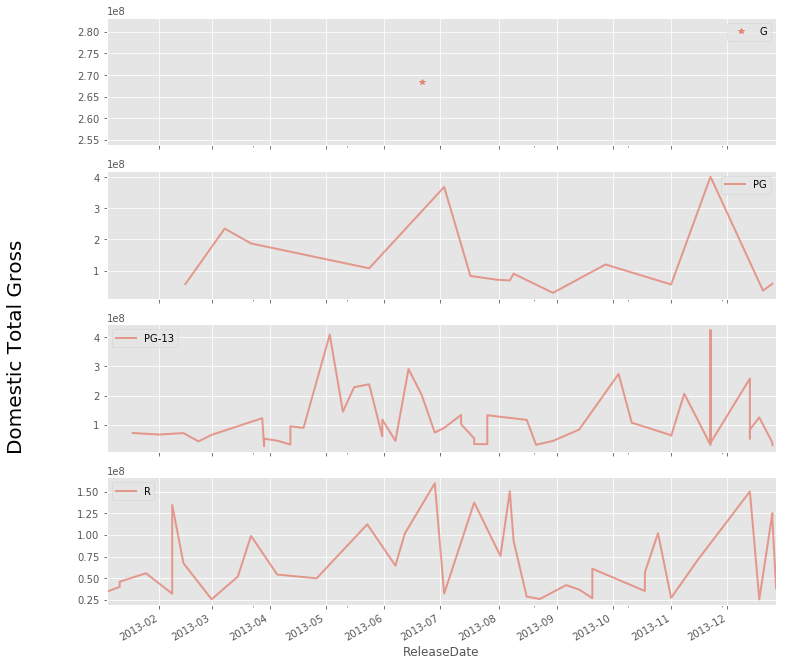

In [13]:
# 4 separate plots, but part of the same matplotlib figure.
      
fig, axs = plt.subplots(4,1, figsize=subplot_fig_ratio, sharex=True)

for i, (name, group) in enumerate(df_rating_group):
    group.plot(
        x='ReleaseDate',y='DomesticTotalGross',
        label=name,
        ax = axs[i],
        alpha = .5, 
        style = ('*' if name=='G' else '-'), # because there is only one record with G
        linewidth=2)

fig.text(x=.01, y=.5, s='Domestic Total Gross', fontsize=20, va='center', rotation=90);


### Exercise 5

- What director in your dataset has the highest gross per movie (highest avg gross)?
- Find the top 3 directors with the highest average gross with "one-hit-wonders" removed.

In [18]:
df_directors = df[['Director','DomesticTotalGross','Title']]
df_directors.columns = ['Director','DomesticTotalGross','MovieCount']
df_directors = df_directors.groupby(['Director']).agg({'MovieCount': lambda x:len(x), 'DomesticTotalGross':  np.mean})
df_directors = df_directors.reset_index().sort('DomesticTotalGross', ascending=False)

highest = df_directors.iloc[0]
print (highest)

top3 = df_directors[df_directors['MovieCount'] >1].iloc[:3]
print ('\n')
print (top3)

Director              Francis Lawrence
MovieCount                           1
DomesticTotalGross           424668047
Name: 27, dtype: object


          Director  MovieCount  DomesticTotalGross
35       James Wan           2           110493294
90     Tyler Perry           2            52259354
59  Malcolm D. Lee           2            51270491


### Exercise 6

- Bin the dataset into months and make a bar graph with error bars of gross each year

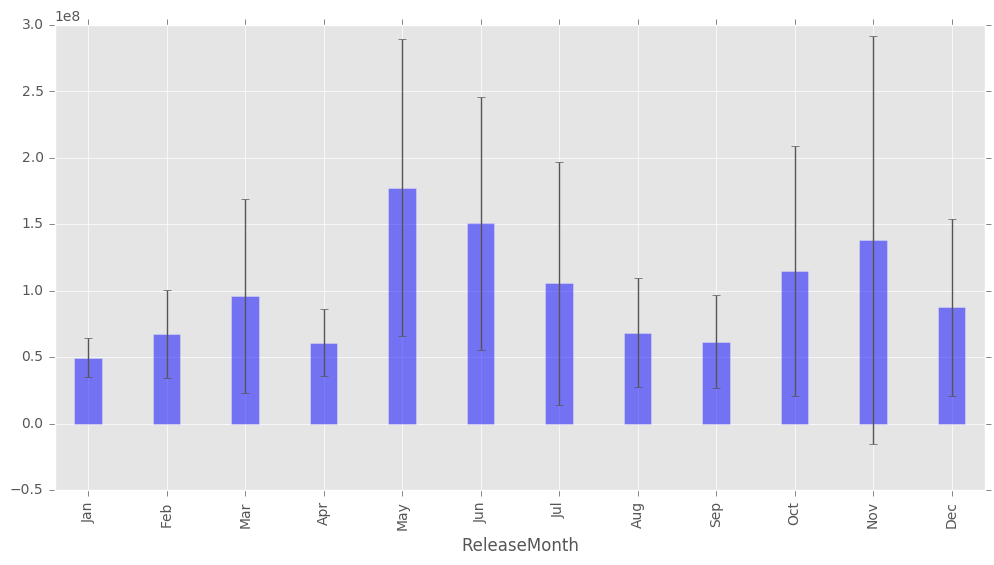

In [146]:
from datetime import datetime

data_monthly = []
for name, group in df[['ReleaseDate','DomesticTotalGross']].groupby([pd.Grouper(freq='M',key='ReleaseDate')]):
    data_monthly.append([datetime(year=name.year, month=name.month, day=1),
                     float(group.mean()),
                     float(group.std())])
    
df_monthly = pd.DataFrame(data_monthly, columns = ['ReleaseMonth','Gross_mean','Gross_std'])

# Since it is not defined what the error bar supposed to represent, I make it a std of monthly DomesticTotalGross

width = 0.35

fig, ax = plt.subplots(figsize = (fig_ratio))
df_monthly.plot(
    x ='ReleaseMonth', 
    y = 'Gross_mean', 
    kind='bar', 
    width=width, 
    ax = ax, 
    yerr = 'Gross_std', 
    color='b', alpha = .5, legend = False)
ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']);
